In [1]:
import pandas as pd
import seaborn as sns
import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
import time
import matplotlib.colors as mcolors
import logomaker as lm
from matplotlib_venn import venn2

Matplotlib is building the font cache; this may take a moment.


In [2]:
#reading txt file to pd df
with open("pred_test_4.3.3.txt", "r") as f:
    lines = f.readlines()
with open("pred_without_unwanted_lines_epitopes.txt", "w") as f:
    for line in lines:
            if line.startswith("#"):
                continue
            if line.startswith("-"):
                continue
            if line.startswith("P"):                
                continue 
            if line.startswith("HLA-"):                
                 continue                     
            if line.endswith("<= WB\n"):                
                line=line.replace('<= WB\n', '\n')        
            if line.endswith("<= SB\n"):                
                line=line.replace('<= SB\n', '\n')        
            f.write(line)

#reading whitespace delimiter file
mutant_df=pd.read_csv("pred_without_unwanted_lines_epitopes.txt",delim_whitespace=True,skip_blank_lines=True,error_bad_lines=False,warn_bad_lines=False)   



C:\Users\Elinor\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,4,5,6,7,8,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
mutant_df=mutant_df[~mutant_df['Peptide'].str.startswith('X')]#removing redundat values
mutant_df=mutant_df[~mutant_df['Peptide'].str.startswith('Peptide')]#removing redundat values
mutant_df.set_index(["Peptide"],inplace=True)

In [4]:
mutant_df

,Pos,MHC,Core,Of,Gp,Gl,Ip,Il,Icore,Identity,Score_EL,%Rank_EL,BindLevel
Peptide,,,,,,,,,,,,,
AAAAAIFVI,1,HLA-A*0101,AAAAAIFVI,0,0,0,0,0,AAAAAIFVI,PEPLIST,0.000711,22.807,NaN
AAAAPYAGW,1,HLA-A*0101,AAAAPYAGW,0,0,0,0,0,AAAAPYAGW,PEPLIST,0.005269,7.02,NaN
AAAARAAAL,1,HLA-A*0101,AAAARAAAL,0,0,0,0,0,AAAARAAAL,PEPLIST,0.001481,14.832,NaN
AAAATCALV,1,HLA-A*0101,AAAATCALV,0,0,0,0,0,AAAATCALV,PEPLIST,0.001166,17.056,NaN
AAAKAAAAV,1,HLA-A*0101,AAAKAAAAV,0,0,0,0,0,AAAKAAAAV,PEPLIST,0.001213,16.682,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEIISFKSL,1,HLA-B*5701,SEIISFKSL,0,0,0,0,0,SEIISFKSL,PEPLIST,0.002152,17.927,NaN
SMYLPGAEV,1,HLA-B*5701,SMYLPGAEV,0,0,0,0,0,SMYLPGAEV,PEPLIST,0.000938,25.807,NaN
TIGVDFALK,1,HLA-B*5701,TIGVDFALK,0,0,0,0,0,TIGVDFALK,PEPLIST,0.000311,39.773,NaN


In [10]:
list_of_hla=[]
for hla in mutant_df["MHC"]:
    list_of_hla.append(hla)
list_of_hla=list(set(list_of_hla))   
list_of_hla.remove('HLA-B5801-expfix+')
len(list_of_hla)

26

In [11]:
#HLA as columns[] 
list_of_hla=list(set(list_of_hla))    
data_hla_as_col=pd.DataFrame()
for hla in list_of_hla:
    data_hla_as_col[hla]=mutant_df["%Rank_EL"][mutant_df["MHC"]==hla]   
#mutant_df["HLA-A0101"]=hla_list  
#data_orgenaized=data_orgenaized.astype('int').dtypes
data_hla_as_col = data_hla_as_col.astype(float) 
data_hla_as_col

,HLA-B*5701,HLA-B*0801,HLA-A*3201,HLA-B*1501,HLA-B*0702,HLA-A*3002,HLA-A*2402,HLA-A*0206,HLA-A*3001,HLA-B*4403,...,HLA-A*6802,HLA-B*4001,HLA-A*0101,HLA-A*0301,HLA-A*2301,HLA-A*0201,HLA-A*3101,HLA-B*4402,HLA-B*5101,HLA-A*3301
Peptide,,,,,,,,,,,,,,,,,,,,,
AAAAAIFVI,4.015,18.493,2.330,12.447,8.007,16.821,9.468,2.155,6.906,12.264,...,2.464,8.509,22.807,21.179,9.096,6.466,18.447,10.574,0.967,32.400
AAAAPYAGW,0.204,23.221,0.276,5.059,5.094,3.473,3.212,15.043,10.196,1.788,...,6.249,11.333,7.020,10.016,3.085,25.683,10.295,1.221,5.813,11.483
AAAARAAAL,14.128,0.233,5.298,4.311,0.276,8.610,17.978,3.522,6.310,10.536,...,3.020,4.891,14.832,17.148,20.074,8.499,15.611,9.158,4.856,24.194
AAAATCALV,17.830,37.923,13.208,28.552,16.108,15.919,26.500,2.636,14.729,24.917,...,1.788,17.467,17.056,35.143,27.800,5.134,26.237,23.562,3.641,30.000
AAAKAAAAV,18.628,10.324,8.792,9.041,1.905,9.805,29.714,1.268,8.496,13.116,...,1.011,8.433,16.682,24.880,31.500,4.297,26.921,12.433,2.263,31.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SEHGFGPSL,27.600,2.471,5.612,2.012,2.119,5.301,7.596,3.260,11.863,0.076,...,8.433,0.006,7.031,16.940,7.898,7.870,21.716,0.092,4.135,16.371
SEIISFKSL,17.927,1.803,6.715,3.427,5.005,13.165,5.354,4.955,22.454,0.062,...,9.176,0.044,12.837,23.552,5.081,11.370,24.458,0.067,5.847,16.735
SMYLPGAEV,25.807,3.819,1.733,2.038,4.023,4.061,10.511,0.629,4.357,11.147,...,1.849,6.529,13.358,5.964,8.980,0.405,9.821,12.900,2.516,10.976


In [13]:
def binding_feedback_func(x):
    """get values and returns the feedback regarding the binding"""
    if x <= 0.5:
        return 'SB'
    elif 0.5<x<=2:
        return 'WB'
    else:
        return 'NB'

In [14]:
#adding the cumber of each peptide is sb,nb,wb as columns
nb=[]
wb=[]
sb=[]
for peptide in data_hla_as_col.index:   
    nb.append(data_hla_as_col.loc[str(peptide)][list_of_hla].apply(binding_feedback_func).str.contains('NB', regex=False).sum())
    sb.append(data_hla_as_col.loc[str(peptide)][list_of_hla].apply(binding_feedback_func).str.contains('SB', regex=False).sum())
    wb.append(data_hla_as_col.loc[str(peptide)][list_of_hla].apply(binding_feedback_func).str.contains('WB', regex=False).sum()) 
    
data_hla_as_col["NB"]=nb    
data_hla_as_col["SB"]=sb  
data_hla_as_col["WB"]=wb    


In [18]:
data_hla_as_col

,HLA-B*5701,HLA-B*0801,HLA-A*3201,HLA-B*1501,HLA-B*0702,HLA-A*3002,HLA-A*2402,HLA-A*0206,HLA-A*3001,HLA-B*4403,...,HLA-A*0301,HLA-A*2301,HLA-A*0201,HLA-A*3101,HLA-B*4402,HLA-B*5101,HLA-A*3301,NB,SB,WB
Peptide,,,,,,,,,,,,,,,,,,,,,
SVYPHVQTF,0.132,0.123,0.001,0.004,0.529,0.073,0.081,0.134,0.181,0.845,...,0.787,0.032,0.812,1.033,0.809,0.285,1.478,0,15,11
VTYPPPLTL,0.139,0.973,0.007,0.462,0.482,0.360,0.363,0.083,0.091,3.046,...,0.880,0.256,0.313,1.792,2.951,0.145,2.723,4,14,8
YVIPHVHAF,0.404,0.056,0.019,0.007,0.656,0.357,0.138,0.038,2.825,1.241,...,3.470,0.079,0.478,2.640,1.145,0.594,1.205,4,14,8
FTDPHIITF,0.155,0.254,0.082,0.321,0.922,0.614,0.239,0.023,5.975,1.479,...,3.291,0.226,0.198,4.808,1.334,0.398,3.571,6,14,6
SAYPHQLSF,0.079,0.107,0.008,0.016,0.358,0.137,0.331,0.574,0.343,1.104,...,1.183,0.210,2.389,2.490,1.083,0.060,3.489,4,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HHLQDSQQL,20.596,3.659,11.147,12.468,6.588,6.657,3.493,11.204,27.915,3.350,...,31.400,3.164,14.154,26.237,3.606,8.972,23.643,26,0,0
HHLLSDVTV,42.059,10.873,22.537,23.836,15.393,20.975,6.916,24.543,31.787,12.624,...,49.333,6.235,24.604,38.000,13.053,6.710,27.038,26,0,0
HHLKEQHHI,10.548,4.536,8.843,19.500,15.437,10.196,1.495,17.088,17.276,3.286,...,39.000,1.272,17.361,25.721,3.213,4.432,13.297,24,0,2


In [19]:
data_hla_as_col=data_hla_as_col.sort_values(["SB"],ascending=False)
data_hla_as_col[data_hla_as_col["SB"]>5]

,HLA-B*5701,HLA-B*0801,HLA-A*3201,HLA-B*1501,HLA-B*0702,HLA-A*3002,HLA-A*2402,HLA-A*0206,HLA-A*3001,HLA-B*4403,...,HLA-A*0301,HLA-A*2301,HLA-A*0201,HLA-A*3101,HLA-B*4402,HLA-B*5101,HLA-A*3301,NB,SB,WB
Peptide,,,,,,,,,,,,,,,,,,,,,
SVYPHVQTF,0.132,0.123,0.001,0.004,0.529,0.073,0.081,0.134,0.181,0.845,...,0.787,0.032,0.812,1.033,0.809,0.285,1.478,0,15,11
FTDPHIITF,0.155,0.254,0.082,0.321,0.922,0.614,0.239,0.023,5.975,1.479,...,3.291,0.226,0.198,4.808,1.334,0.398,3.571,6,14,6
VTYPPPLTL,0.139,0.973,0.007,0.462,0.482,0.360,0.363,0.083,0.091,3.046,...,0.880,0.256,0.313,1.792,2.951,0.145,2.723,4,14,8
YVIPHVHAF,0.404,0.056,0.019,0.007,0.656,0.357,0.138,0.038,2.825,1.241,...,3.470,0.079,0.478,2.640,1.145,0.594,1.205,4,14,8
SAYPHQLSF,0.079,0.107,0.008,0.016,0.358,0.137,0.331,0.574,0.343,1.104,...,1.183,0.210,2.389,2.490,1.083,0.060,3.489,4,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SVYSGHQSV,7.041,1.101,0.237,1.593,1.056,1.496,5.661,0.040,0.195,5.006,...,2.991,4.901,0.215,4.849,4.812,0.743,4.931,14,6,6
SIITYVVTY,2.406,5.883,0.158,0.092,9.725,0.132,6.072,3.656,2.134,2.879,...,0.816,4.254,6.121,3.734,3.091,8.973,3.991,16,6,4
SIIPYILKM,2.147,1.062,0.143,0.682,2.705,0.974,2.241,0.064,1.428,4.465,...,2.195,1.520,0.223,3.698,4.429,1.782,3.416,11,6,9


In [16]:
data_hla_as_col[data_hla_as_col["WB"]>5]

,HLA-B*5701,HLA-B*0801,HLA-A*3201,HLA-B*1501,HLA-B*0702,HLA-A*3002,HLA-A*2402,HLA-A*0206,HLA-A*3001,HLA-B*4403,...,HLA-A*0301,HLA-A*2301,HLA-A*0201,HLA-A*3101,HLA-B*4402,HLA-B*5101,HLA-A*3301,NB,SB,WB
Peptide,,,,,,,,,,,,,,,,,,,,,
SVYPHVQTF,0.132,0.123,0.001,0.004,0.529,0.073,0.081,0.134,0.181,0.845,...,0.787,0.032,0.812,1.033,0.809,0.285,1.478,0,15,11
VTYPPPLTL,0.139,0.973,0.007,0.462,0.482,0.360,0.363,0.083,0.091,3.046,...,0.880,0.256,0.313,1.792,2.951,0.145,2.723,4,14,8
YVIPHVHAF,0.404,0.056,0.019,0.007,0.656,0.357,0.138,0.038,2.825,1.241,...,3.470,0.079,0.478,2.640,1.145,0.594,1.205,4,14,8
FTDPHIITF,0.155,0.254,0.082,0.321,0.922,0.614,0.239,0.023,5.975,1.479,...,3.291,0.226,0.198,4.808,1.334,0.398,3.571,6,14,6
SAYPHQLSF,0.079,0.107,0.008,0.016,0.358,0.137,0.331,0.574,0.343,1.104,...,1.183,0.210,2.389,2.490,1.083,0.060,3.489,4,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HADGLCHRL,4.972,1.548,6.017,14.583,2.598,6.479,8.323,1.173,23.163,10.018,...,23.138,8.096,2.848,19.052,8.763,1.397,10.855,19,0,7
HAPDNFREL,6.188,0.929,5.478,5.313,1.778,5.490,2.461,1.847,10.187,7.106,...,19.930,2.907,4.737,16.733,7.516,0.620,8.320,18,0,8
HAPLSPRTF,1.246,2.165,1.858,1.435,2.019,4.755,0.799,12.515,12.458,4.609,...,21.179,0.920,20.598,19.629,4.299,0.764,15.245,17,0,9


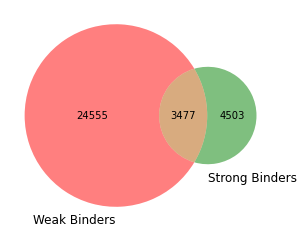

In [17]:
#the stack graphs seems very similar let's check the venn diagram if there is an overlap
venn2(subsets = [set(data_hla_as_col.index[data_hla_as_col["WB"]>5]), set(data_hla_as_col.index[data_hla_as_col["SB"]>5])],set_labels = ('Weak Binders', 'Strong Binders'), set_colors=('r', 'g'), alpha = 0.5)

In [20]:
data_hla_as_col[data_hla_as_col["WB"]>5].to_csv("weak_binders_epitopes.csv")

In [21]:
data_hla_as_col[data_hla_as_col["SB"]>5].to_csv("strong_binders_epitopes.csv")